In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

path="/content/compositions_2_.csv"
data=pd.read_csv(path)
data.head()

,Alloy,Cr,Co,Mo,W,Ta,Nb,Al,Ti,Fe,...,Si,La,Y,V,P,S,Cu,O,Ni,Output
0,ATI 718Plus,19.0,9.0,2.8,1.1,0.0,5.6,1.45,0.75,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.2695,1
1,Waspaloy,19.5,13.5,4.3,0.0,0.0,0.0,1.30,3.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.2540,1
2,Nimonic 115,15.0,20.0,5.0,0.0,0.0,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0000,1
3,PWA 1484,5.0,10.0,2.0,6.0,9.0,0.5,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.2000,1
4,Rene 41,19.0,11.0,10.0,0.0,0.0,0.0,1.50,3.10,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.2600,1


In [ ]:
data.isnull().any().any()
data.isnull().any()

Alloy     False
Cr        False
Co        False
Mo        False
W         False
Ta        False
Nb        False
Al        False
Ti        False
Fe        False
C         False
B         False
Zr        False
Re        False
Hf        False
Mn        False
Si        False
La        False
Y         False
V         False
P         False
S         False
Cu        False
O         False
Ni        False
Output    False
dtype: bool

In [ ]:
X=data.iloc[ : ,1:-1]
y=data.iloc[ : , -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.33, random_state=42)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf1 = DecisionTreeClassifier(random_state=10)
clf1.fit(X_train, y_train)
y_pred=clf1.predict(X_test)
print("Accuracy " +str(accuracy_score(y_test, y_pred)*100)+"%")

Accuracy 60.71428571428571%


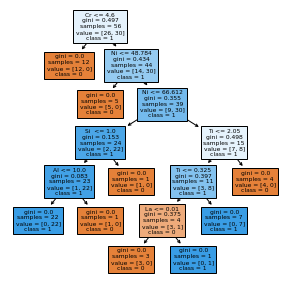

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
fig = plt.figure(figsize=(5,5))
_ = tree.plot_tree(clf1,feature_names=X.columns,class_names=['0', "1"],filled=True)

Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(random_state=10).fit(X_train, y_train)
y_pred=clf2.predict(X_test)
print("Accuracy " +str(accuracy_score(y_test, y_pred)*100)+"%")

Accuracy 64.28571428571429%


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train,y_train)
y_pred=neigh.predict(X_test)
print("Accuracy " +str(accuracy_score(y_test, y_pred)*100)+"%")

Accuracy 64.28571428571429%


SVM


In [ ]:
from sklearn import svm
clf3 = svm.SVC(random_state=39)
clf3.fit(X_train, y_train)
y_pred=clf3.predict(X_test)
print("Accuracy " +str(accuracy_score(y_test, y_pred)*100)+"%")

Accuracy 71.42857142857143%


Hyperparameter tuning


for decision tree


In [ ]:
# Create the parameter grid based on the results of random search
params = {
    'max_depth': [1,2, 3,4,5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [ ]:
from sklearn.model_selection import GridSearchCV#
#Instantiate the grid search model
grid_search = GridSearchCV(estimator=clf1,param_grid=params,cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
%%time
grid_search.fit(X, y)
dt_best = grid_search.best_estimator_

Fitting 4 folds for each of 70 candidates, totalling 280 fits
CPU times: user 470 ms, sys: 93.5 ms, total: 563 ms
Wall time: 5.05 s


In [ ]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))

In [ ]:
evaluate_model(dt_best)

Train Accuracy : 0.8392857142857143
Test Accuracy : 0.7857142857142857


svm

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'C':[0.1,1,100,1000],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6]}
grid = GridSearchCV(svm.SVC(),param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [ ]:
print(grid.best_params_)
print(grid.score(X_test,y_test))

{'C': 100, 'degree': 4, 'kernel': 'poly'}
0.6785714285714286


Logistic Regression


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
dt_bst = grid_search.best_estimator_
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))

evaluate_model(dt_bst)

Train Accuracy : 0.8571428571428571
Test Accuracy : 0.75


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(X_train, y_train)
g_res.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', weights='distance')

In [ ]:
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [ ]:
from sklearn import metrics
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))


Training set accuracy:  1.0
Test set accuracy:  0.6785714285714286
